<a href="https://colab.research.google.com/github/Riab22209/CE880-Case-Study-repository/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_shipping.xlsx to Data_shipping.xlsx


# Load the data from the dataset Data_shipping

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pd.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
filename ="Data_shipping.xlsx"
data = pd.read_excel(filename)
data


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Histogram

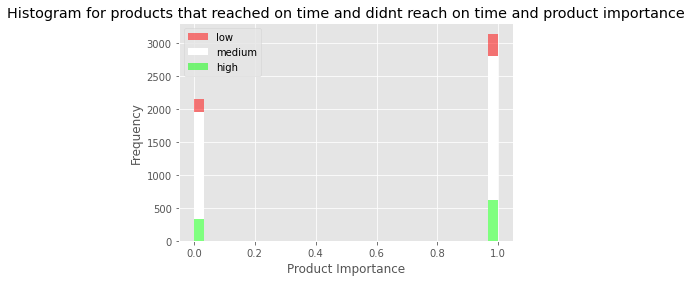

In [5]:
m = plt.hist(data[data["Product_importance"] == "low"].ROT_Y,bins=30,fc = (1,0,0,0.5),label = "low")
b = plt.hist(data[data["Product_importance"] == "medium"].ROT_Y,bins=30,fc = 'white',label = "medium")
b = plt.hist(data[data["Product_importance"] == "high"].ROT_Y,bins=30,fc = (0,1,0,0.5),label = "high")
plt.legend()
plt.xlabel("Product Importance")
plt.ylabel("Frequency")
plt.title("Histogram for products that reached on time and didnt reach on time and product importance")
plt.show()

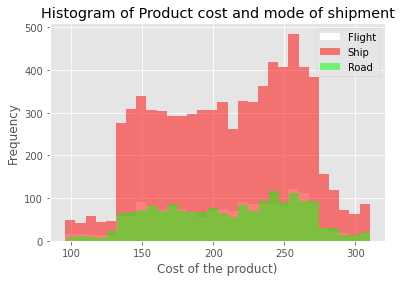

In [6]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].Cost_of_the_Product,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].Cost_of_the_Product,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].Cost_of_the_Product,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Cost of the product)")
plt.ylabel("Frequency")
plt.title("Histogram of Product cost and mode of shipment")
plt.show()

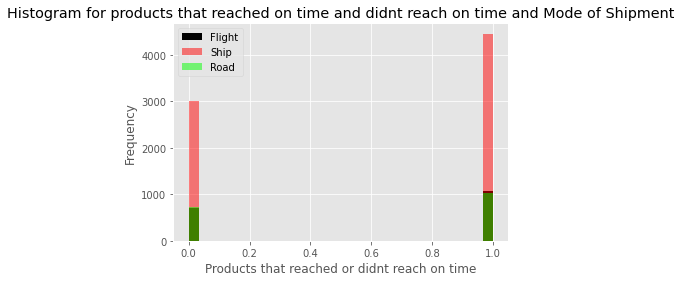

In [7]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].ROT_Y,bins=30,fc = 'Black',label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].ROT_Y,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].ROT_Y,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Products that reached or didnt reach on time")
plt.ylabel("Frequency")
plt.title("Histogram for products that reached on time and didnt reach on time and Mode of Shipment")
plt.show()

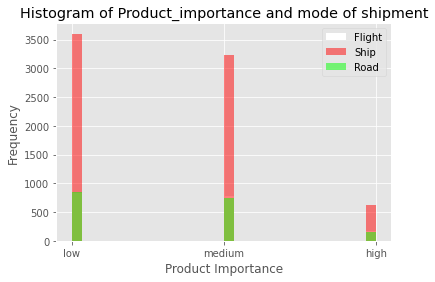

In [8]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].Product_importance,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].Product_importance,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].Product_importance,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Product Importance")
plt.ylabel("Frequency")
plt.title("Histogram of Product_importance and mode of shipment")
plt.show()

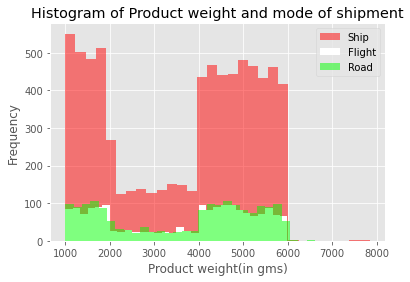

In [9]:
m = plt.hist(data[data["Mode_of_Shipment"] == "Ship"].Weight_in_gms,bins=30,fc = (1,0,0,0.5),label = "Ship")
b = plt.hist(data[data["Mode_of_Shipment"] == "Flight"].Weight_in_gms,bins=30,fc = (1,1,1,1),label = "Flight")
b = plt.hist(data[data["Mode_of_Shipment"] == "Road"].Weight_in_gms,bins=30,fc = (0,1,0,0.5),label = "Road")
plt.legend()
plt.xlabel("Product weight(in gms)")
plt.ylabel("Frequency")
plt.title("Histogram of Product weight and mode of shipment")
plt.show()

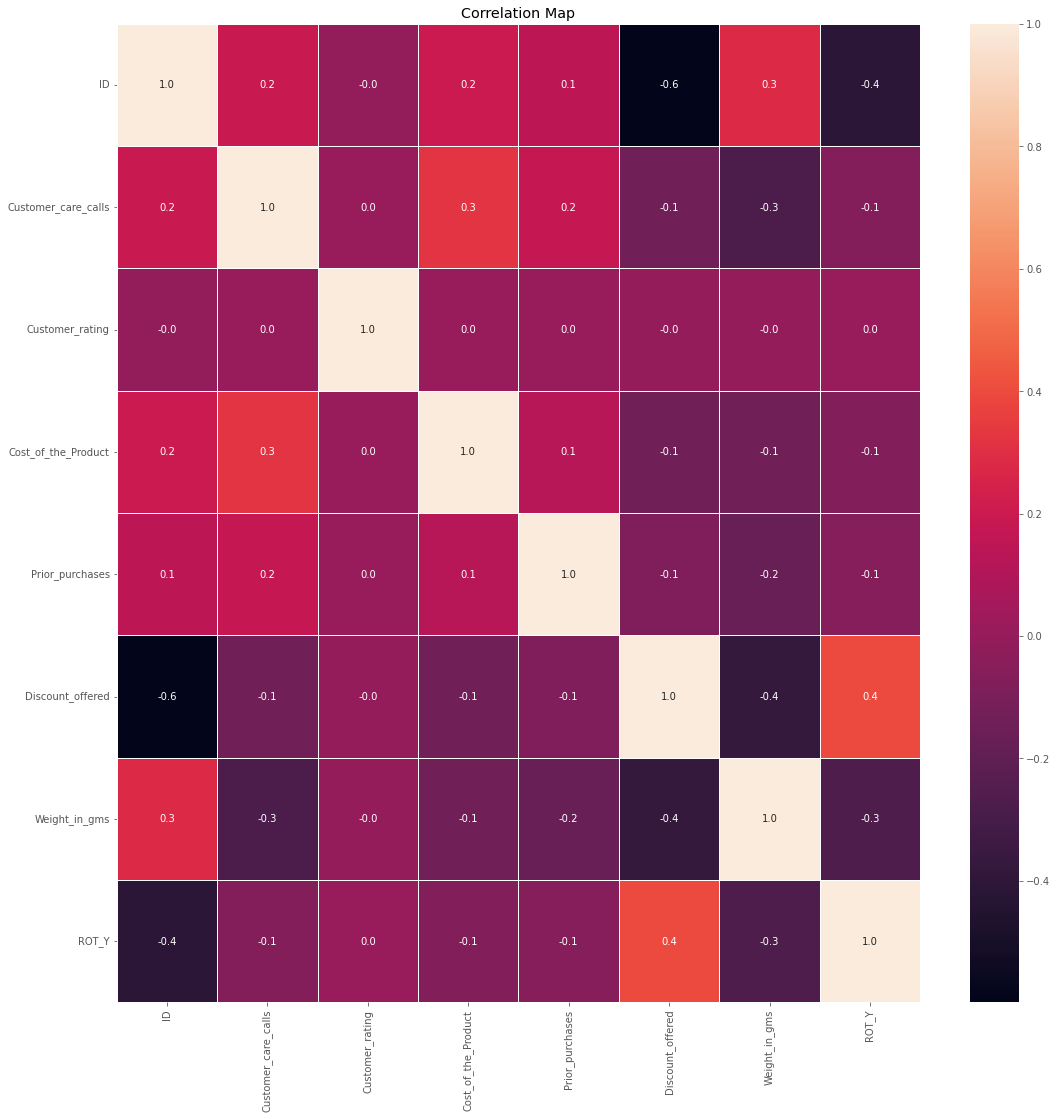

In [10]:
#The range of these numbers are -1 to 1.If the number is positive that indicates the two variables are positively correlated.A negative value indicates that there is negative correlation and zero means there is no correlation.
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

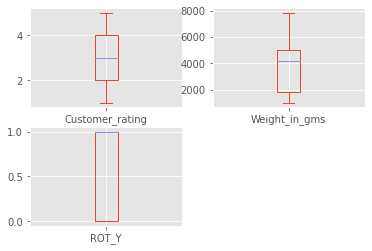

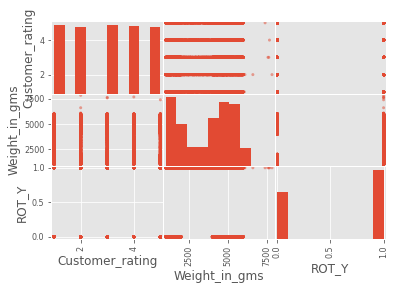

In [11]:
col_names = ['Mode_of_Shipment', 'Customer_rating','Product_importance','Weight_in_gms','ROT_Y']
dataset = data[col_names]
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [12]:
# check missing values in variables
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
ROT_Y                  0
dtype: int64

In [13]:
#Frequency count of categorical variables
col_names = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance','Gender','ROT_Y']
for col in col_names:
    print(data[col].value_counts())   

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
F    5545
M    5454
Name: Gender, dtype: int64
1    6563
0    4436
Name: ROT_Y, dtype: int64


In [14]:
#The target variable is ROT_Y which has two value 0 amd 1,where 0 indicates it has reached on time and 1 indicates it hasnt reached on time
data['ROT_Y'].value_counts()

1    6563
0    4436
Name: ROT_Y, dtype: int64

In [16]:
# import category encoders
!pip install category-encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [18]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance','Gender'])
#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)

In [19]:
#feature vector and target variable
X = data.drop(['ROT_Y'], axis=1)
y = data['ROT_Y']
# split data into 80:20 training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8799, 11), (2200, 11))

In [20]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [21]:
# check data types in X_train
X_train.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
dtype: object

In [22]:
X_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
8965,8966,1,1,1,1,178,1,1,1,7,4135
5936,5937,2,1,2,2,202,2,2,1,3,4496
10656,10657,3,1,3,1,277,1,2,2,6,1032
3328,3329,4,1,4,1,219,3,2,2,4,4289
9880,9881,4,2,2,2,296,2,1,1,4,1650


In [23]:
X_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,108,1,1,5,1,216,1,3,2,26,2053
5594,5595,2,3,1,3,220,1,1,1,6,5572
6997,6998,1,2,1,4,215,2,1,1,3,4042
3984,3985,3,2,4,3,160,4,1,1,1,4672
3111,3112,5,1,4,5,229,3,2,1,44,2419


In [24]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [25]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict_knn = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict_knn))
print(classification_report(y_test, y_predict_knn)) 

[[557 338]
 [405 900]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       895
           1       0.73      0.69      0.71      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



In [26]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_svc = svm.predict(X_test)
# Print results: 
print(confusion_matrix(y_test, y_predict_svc))
print(classification_report(y_test, y_predict_svc))

[[792 103]
 [583 722]]
              precision    recall  f1-score   support

           0       0.58      0.88      0.70       895
           1       0.88      0.55      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.75      0.69      0.69      2200



In [27]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_xgb = xgb_clf.predict(X_test)
# Print results: 
print(confusion_matrix(y_test, y_predict_xgb))
print(classification_report(y_test, y_predict_xgb))

[[579 316]
 [436 869]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       895
           1       0.73      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



In [28]:
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_dt = decision_tree.predict(X_test)
# Print results: 
print(confusion_matrix(y_test, y_predict_dt))
print(classification_report(y_test, y_predict_dt))

[[496 399]
 [377 928]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200



In [29]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict_rf = random_forest.predict(X_test)
# Print results: 
print(confusion_matrix(y_test, y_predict_rf))
print(classification_report(y_test, y_predict_rf))

[[685 210]
 [510 795]]
              precision    recall  f1-score   support

           0       0.57      0.77      0.66       895
           1       0.79      0.61      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.69      0.67      2200
weighted avg       0.70      0.67      0.67      2200



In [30]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
#predict test results with gini index
y_pred_gini = clf_gini.predict(X_test)

In [32]:
#accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6945


In [33]:
#compare the train-set and test-set accuracy to check for overfitting.
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6868


In [34]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6868
Test set score: 0.6945


[Text(0.375, 0.875, 'x[0] <= -0.747\ngini = 0.481\nsamples = 8799\nvalue = [3541, 5258]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 2502\nvalue = [0, 2502]'),
 Text(0.5, 0.625, 'x[5] <= 0.603\ngini = 0.492\nsamples = 6297\nvalue = [3541, 2756]'),
 Text(0.25, 0.375, 'x[4] <= -0.35\ngini = 0.488\nsamples = 3840\nvalue = [2212, 1628]'),
 Text(0.125, 0.125, 'gini = 0.494\nsamples = 1529\nvalue = [846, 683]'),
 Text(0.375, 0.125, 'gini = 0.483\nsamples = 2311\nvalue = [1366, 945]'),
 Text(0.75, 0.375, 'x[0] <= -0.721\ngini = 0.497\nsamples = 2457\nvalue = [1329, 1128]'),
 Text(0.625, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.875, 0.125, 'gini = 0.497\nsamples = 2441\nvalue = [1315, 1126]')]

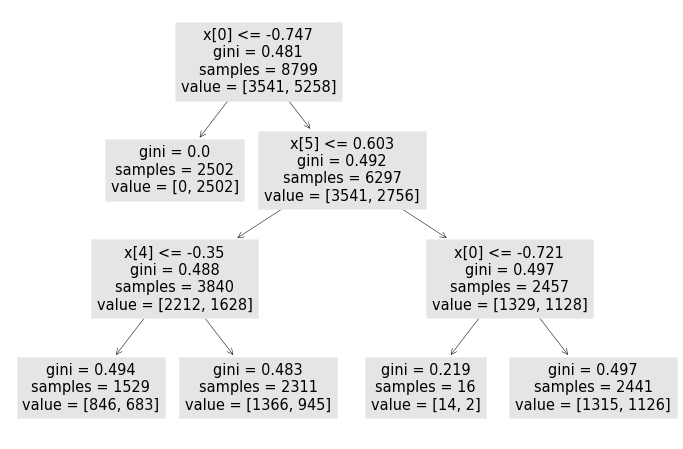

In [35]:
#visualize decision trees
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [36]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6700


In [37]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.6700


In [38]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
# view the feature scores
X_train = pd.DataFrame(X_train, columns = X.columns)
feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

ID                     0.272197
Weight_in_gms          0.188074
Discount_offered       0.157153
Cost_of_the_Product    0.134808
Warehouse_block        0.048689
Customer_rating        0.045017
Prior_purchases        0.042366
Customer_care_calls    0.039165
Mode_of_Shipment       0.027013
Product_importance     0.026154
Gender                 0.019365
dtype: float64

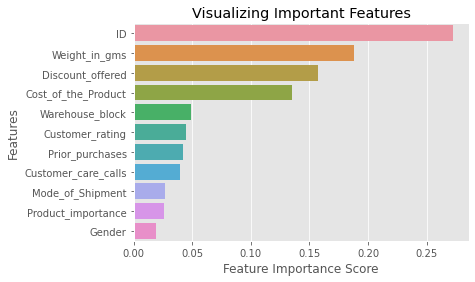

In [42]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [43]:
#drop least important feature gender and agin split the model
# declare feature vector and target variable
X = data.drop(['Gender','ROT_Y'], axis=1)
y = data['ROT_Y']
# split data into 80:20 training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8799, 10), (2200, 10))

In [46]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [47]:
X_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
8965,8966,1,1,1,1,178,1,1,7,4135
5936,5937,2,1,2,2,202,2,2,3,4496
10656,10657,3,1,3,1,277,1,2,6,1032
3328,3329,4,1,4,1,219,3,2,4,4289
9880,9881,4,2,2,2,296,2,1,4,1650


In [48]:
X_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
107,108,1,1,5,1,216,1,3,26,2053
5594,5595,2,3,1,3,220,1,1,6,5572
6997,6998,1,2,1,4,215,2,1,3,4042
3984,3985,3,2,4,3,160,4,1,1,4672
3111,3112,5,1,4,5,229,3,2,44,2419


In [49]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with gender variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#accuracy score increased from .670 to .677

Model accuracy score with doors variable removed : 0.6777


In [54]:
#drop least important feature gender and agin split the model
# declare feature vector and target variable
X = data.drop(['Gender','Product_importance','ROT_Y'], axis=1)
y = data['ROT_Y']
# split data into 80:20 training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8799, 9), (2200, 9))

In [55]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [56]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with Product_importance variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#accuracy score decreased to 0.6564

Model accuracy score with doors variable removed : 0.6564


In [57]:
#drop least important feature gender and agin split the model
# declare feature vector and target variable
X = data.drop(['Gender','Mode_of_Shipment','ROT_Y'], axis=1)
y = data['ROT_Y']
# split data into 80:20 training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8799, 9), (2200, 9))

In [58]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Warehouse_block',  'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [59]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with Mode_of_Shipment variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#accuracy score decreased to 0.6591

Model accuracy score with doors variable removed : 0.6591
